# Boosting
- A road to success is incomplete without any failures in life. Each failure teaches you something new and makes you stronger at each phase. Each time you make a mistake, it’s important to learn from it and try not to repeat it again. That's how the idea of boosting is come to picture where each weak model modifyed and become a better model.

- Just as we sometimes develop life skills by learning from our mistakes, we can train our model to learn from the errors predicted and improvise the model’s prediction and overall performance. This is the most basic intuition of Boosting algorithm in Machine Learning.

<h2>What is Boosting?</h2>
The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners. Boosting is an ensemble method for improving the model predictions of any given learning algorithm. The idea of boosting is to train weak learners sequentially, each trying to correct its predecessor.</br>
<a href="boosting.jpg"><img src="https://i.ibb.co/jf5h5xk/1-jbncje-M4-Cfpob-En-DO0-ZTjw.webp" alt="1-jbncje-M4-Cfpob-En-DO0-ZTjw" border="0"></a>

To understand Boosting, it is crucial to recognize that boosting is a generic algorithm rather than a specific model. Boosting needs you to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it.

With that sorted out, it is time to explore different definitions of weakness and their corresponding algorithms. We’ll introduce two major algorithms: Gradient Boosting, Adaptive Boosting (AdaBoost) and Extreme Gradient Boosting (XGBoost).

# Gradient Boosting

In Gradient Boosting, each predictor tries to improve on its predecessor by reducing the errors. But the fascinating idea behind Gradient Boosting is that instead of fitting a predictor on the data at each iteration, it actually fits a new predictor to the residual errors made by the previous predictor. Let's go through a step by step example of how Gradient Boosting Works:<br>

Let's take the below sample which has a nonlinear relationship between x and y to intuitively understand how it works.<br>

<a href="base_model.jpg"><img src="https://i.ibb.co/NjZjTDr/1-SZdr-Lz-Qa-XBx-So-Tg-RMt-Sxig.webp" alt="1-SZdr-Lz-Qa-XBx-So-Tg-RMt-Sxig" border="0"></a>

The first step is making a very naive prediction on the target y. We make the initial prediction F₀ as an overall average of y:<br>
<a href="predicted_model.jpg"><img src="https://i.ibb.co/LPk2cNB/1-Cff0i-DWUi-C-Tn-Wzw-Um-Vg.webp" alt="1-Cff0i-DWUi-C-Tn-Wzw-Um-Vg" border="0"></a>

You might feel using the mean for the prediction is silly, but don’t worry. We will improve our prediction as we add more weak models to it.

To improve our prediction, we will focus on the residuals (i.e. prediction errors) from the first step because that is what we want to minimize to get a better prediction. The residuals r₁ are shown as the vertical blue lines in the figure below.<br>
<a href="errors.jpg"><img src="https://i.ibb.co/XzH4tqS/1-32x-SZb7-FIIxw-FQeq9-MKCg-Q.webp" alt="1-32x-SZb7-FIIxw-FQeq9-MKCg-Q" border="0"></a>

To minimize these residuals, we are building a regression tree model with x as its feature and the residuals r₁ = y − mean(y) as its target. The reasoning behind that is if we can find some patterns between x and r₁ by building the additional weak model, we can reduce the residuals by utilizing it.

To simplify the demonstration, we are building very simple trees each of that only has one split and two terminal nodes which is called “stump”. Please note that gradient boosting trees usually have a little deeper trees such as ones with 8 to 32 terminal nodes.

Here we are creating the first tree predicting the residuals with two different values $\gamma_1$ = {6.0, −5.9}(we are using $\gamma$ to denotes the prediction).<br>
<a href="improved.jpg"><img src="https://i.ibb.co/HFtKFzw/1-N3-FYNWBEUO1b-VZo4-Bul-WIQ.webp" alt="1-N3-FYNWBEUO1b-VZo4-Bul-WIQ" border="0"></a>

This prediction $\gamma_1$ is added to our initial prediction $F_0$ to reduce the residuals. In fact, gradient boosting algorithm does not simply add $\gamma$ to F as it makes the model overfit to the training data. Instead, $\gamma$ is scaled down by learning rate ν which ranges between 0 and 1, and then added to F.
$$
F_1=F_0+v*\gamma_1
$$
In this example, we use a relatively big learning rate ν = 0.9 to make the optimization process easier to understand, but it is usually supposed to be a much smaller value such as 0.1.

After the update, our combined prediction $F_1$ becomes:<br>
$$F_1=\left\{
\begin{array}{}
F_0+v*6.0 & if x<= 49.5\\
F_0-v*5.9 & otherwise
\end{array}
\right.
$$
<a href="model.jpg"><img src="https://i.ibb.co/h1mdTQ0/1-x-DDhf-FTC57f-YHkhvl-K4-BTg.webp" alt="1-x-DDhf-FTC57f-YHkhvl-K4-BTg" border="0"></a><br>
Now, the updated residuals r₂ looks like this:<br>
<a href="model.jpg"><img src="https://i.ibb.co/QfZ7scm/1-L9-Gp-Euc-S0n4-Vvve-K0ss-I-A.webp" alt="1-L9-Gp-Euc-S0n4-Vvve-K0ss-I-A" border="0"></a>

In the next step, we are creating a regression tree again using the same x as the feature and the updated residuals r₂ as its target. Here is the created tree:<br>
<a href="model.jpg"><img src="https://i.ibb.co/FxbdPRK/1-i-Vz3-E-v-N4-EVNk1z-Utd0p-Ig.webp" alt="1-i-Vz3-E-v-N4-EVNk1z-Utd0p-Ig" border="0"></a><br>
Then, we are updating our previous combined prediction $F_1$ with the new tree prediction $\gamma_2$.<br>
<a href="model.jpg"><img src="https://i.ibb.co/FXnvjZW/1-7dt-Sxq-YLS8tea-SV7-Zv7u-UA.webp" alt="1-7dt-Sxq-YLS8tea-SV7-Zv7u-UA" border="0"></a><br>
Now We iterate these steps until the model prediction stops improving. Let's try thease step using python

## Problem Statement


**An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.**

In [ ]:
import pandas as pd # data handling
import numpy as np # data handling
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

from sklearn.preprocessing import LabelEncoder # creating dummies
from sklearn.model_selection import train_test_split # train test

from sklearn.metrics import roc_auc_score # model accuracy
from sklearn.metrics import confusion_matrix # model accuracy

from xgboost import XGBClassifier # XGB Classifier

from imblearn.over_sampling import RandomOverSampler # Over Sampling to manage Imbalance Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Ivy_Machine_Learning/011GRADIENT_BOOSTING

/content/drive/My Drive/Ivy_Machine_Learning/011GRADIENT_BOOSTING


In [ ]:
data = pd.read_csv('Training Data.csv')
data.head(2)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df = data.dropna().copy()

In [ ]:
#Also id, city, profession and state column is not needed, so we can drop that
df.drop(columns=['Id', 'STATE', 'CITY', 'Profession'], inplace=True, axis=1)

In [ ]:
df = pd.get_dummies(data = df, columns=['Married/Single', 'House_Ownership', 'Car_Ownership'])
df.head(2)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,1303834,23,3,3,13,0,False,True,False,False,True,True,False
1,7574516,40,10,9,13,0,False,True,False,False,True,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Income                        252000 non-null  int64
 1   Age                           252000 non-null  int64
 2   Experience                    252000 non-null  int64
 3   CURRENT_JOB_YRS               252000 non-null  int64
 4   CURRENT_HOUSE_YRS             252000 non-null  int64
 5   Risk_Flag                     252000 non-null  int64
 6   Married/Single_married        252000 non-null  bool 
 7   Married/Single_single         252000 non-null  bool 
 8   House_Ownership_norent_noown  252000 non-null  bool 
 9   House_Ownership_owned         252000 non-null  bool 
 10  House_Ownership_rented        252000 non-null  bool 
 11  Car_Ownership_no              252000 non-null  bool 
 12  Car_Ownership_yes             252000 non-null  bool 
dtypes: bool(7), in

In [ ]:
X = df.drop(columns=['Risk_Flag'])#feature
y = df['Risk_Flag']#dependent

In [ ]:
#y.value_counts()
30996/(221004+30996)
y.value_counts()

,count
Risk_Flag,
0,221004
1,30996


In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_df  = pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.912051,0.844828,0.90,0.214286,0.25,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.262896,0.310345,0.00,0.000000,0.25,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.100127,0.310345,0.45,0.285714,0.75,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.389116,0.000000,0.10,0.142857,0.50,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.946972,0.344828,0.25,0.357143,0.75,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
201595,0.234990,0.655172,0.05,0.071429,0.50,0.0,1.0,0.0,0.0,1.0,0.0,1.0
201596,0.931435,0.517241,1.00,0.500000,0.00,1.0,0.0,0.0,0.0,1.0,1.0,0.0
201597,0.901297,0.068966,0.25,0.357143,0.00,0.0,1.0,0.0,0.0,1.0,1.0,0.0
201598,0.665719,0.327586,0.10,0.142857,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbmclf=GradientBoostingClassifier(loss='log_loss',learning_rate=0.1, n_estimators=1000, max_depth=3)

# Printing all the parameters of Decision Tree
print(gbmclf)

GradientBoostingClassifier(n_estimators=1000)


In [ ]:
# Creating the model on Training Data
GBMC=gbmclf.fit(X_train,y_train)
y_pred=GBMC.predict(X_test)

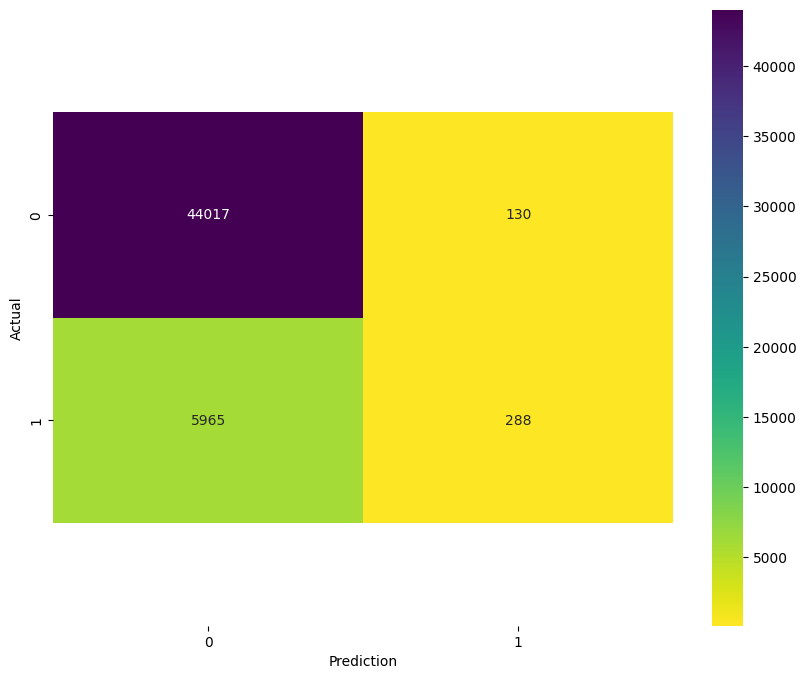

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44147
           1       0.69      0.05      0.09      6253

    accuracy                           0.88     50400
   macro avg       0.78      0.52      0.51     50400
weighted avg       0.86      0.88      0.83     50400



In [ ]:
# import necessary packages to measure model performace
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Checking Confusion Metrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
y_ros.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


,count
Risk_Flag,
0,221004
1,221004


In [ ]:
# Split the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X_ros)

# Generating the standardized values of X
X_ros=PredictorScalerFit.transform(X_ros)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbmclf=GradientBoostingClassifier(loss='log_loss',learning_rate=0.1, n_estimators=1000,criterion='friedman_mse', max_depth=3)

# Printing all the parameters of Decision Tree
print(gbmclf)

GradientBoostingClassifier(n_estimators=1000)


In [ ]:
# Creating the model on Training Data
GBMC=gbmclf.fit(X_train,y_train)
y_pred=GBMC.predict(X_test)

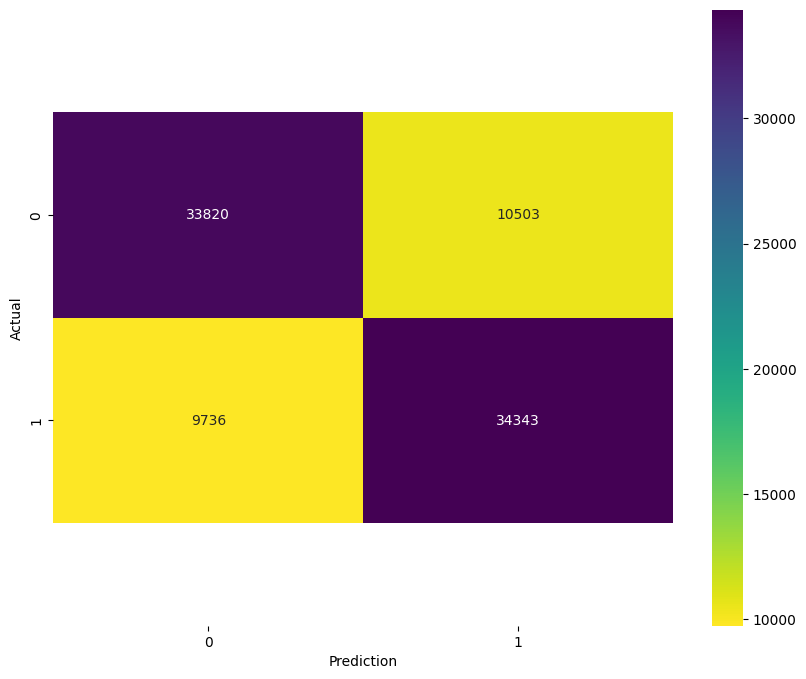

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     44323
           1       0.77      0.78      0.77     44079

    accuracy                           0.77     88402
   macro avg       0.77      0.77      0.77     88402
weighted avg       0.77      0.77      0.77     88402



In [ ]:
# import necessary packages to measure model performace
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Checking Confusion Metrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
# Printing the Overall Accuracy of the model
import sklearn
F1_Score=sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,4))

Accuracy of the model on Testing Sample Data: 0.771


In [ ]:
#XGBoost supports and gives it acclaimed performance and efficiency gains
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X_ros,label=y_ros)


In [ ]:
#k-fold Cross Validation using XGBoost
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}# Parameter Dictionary

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=2000,early_stopping_rounds=10,metrics="error", as_pandas=True, seed=123)

cv_results.head()








,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.472324,0.002665,0.472577,0.002566
1,0.467591,0.002545,0.467772,0.002871
2,0.459297,0.003231,0.459967,0.003715
3,0.447991,0.003532,0.448182,0.003016
4,0.451330,0.004420,0.451849,0.004401


In [ ]:
cv_results.tail(10)

,train-error-mean,train-error-std,test-error-mean,test-error-std
63,0.422806,0.000399,0.423612,0.001464
64,0.422903,0.000648,0.423961,0.000513
65,0.422827,0.001152,0.423795,0.000172
66,0.422296,0.001115,0.423178,0.000623
67,0.421673,0.001101,0.422472,0.000960
68,0.422918,0.000738,0.423725,0.000658
69,0.421363,0.000821,0.422180,0.000689
70,0.421267,0.001574,0.422144,0.000072
71,0.418990,0.002040,0.420056,0.001464
72,0.418452,0.001213,0.419787,0.001608


In [ ]:
# Next Steps:

# - 1. EDA - get the data insights + feature relationships
# - 2. Compare the model performance basic FE : Standard vs MinMax
# - 3. Imbalance Data Model (Gradient Boosting) - Standard vs MinMax
# - 4. CV & Grid Search on Step 3
# - 5. XGB - Also try to change the parameter distribution to see if better results achieved.